# Modeling and Simulation 1 - Python Tutorial

# Introduction

Python is a programming language that can be used for various purposes, and, when combined with commonly used libraries such as numpy, scipy, and matplotlib, it transforms into a powerful tool for carrying out scientific computations.

We expect that few of you will have some experience with Python and numpy; as such this lab will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Fractals

## A Brief Note on Python Versions

As of Janurary 1, 2020, Python has [officially dropped support](https://www.python.org/doc/sunset-python-2/) for `python2`. We'll be using Python 3.X for this iteration of the course. You can check your Python version at the command line by running `python --version`. In Jupyer Notebook we can choose the Python kernel version when loading this document. In Google Colab, we can enforce the Python version by clicking `Runtime -> Change Runtime Type` and selecting `python3`.

In [ ]:
!python --version

# Basics of Python

"Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.

Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library." - Wikipedia

Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

Before everything else, two important differences between Python and C-like languages:
- There is no need to terminate statements with `;`

- Blocks are defined by indentation. There is no `{`,`}`-like equivalent in Python. If you want to write a more complex statement, prepare for big indentations.

# Basic data types in Python

## Numbers

Integers and floats work as you would expect from other languages. Like Matlab, we don't need to bind a type to a variable, but unlike Matlab, the default number type is not double:

In [ ]:
x = 3
print(x, type(x))

In [ ]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation
print(x % 2)   # Modulus
print(x / 2)   # Division
print(x // 2)  # Floor

In [ ]:
x += 1
print(x)
x *= 2
print(x)

In [ ]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-long-complex). This means that we don't have to worry about integer overflow, but we do have to worry about float overflow [Integer Documentation](https://docs.python.org/3/c-api/long.html#integer-objects).

## Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [ ]:
t, f = True, False
print(type(t))

Now we let's look at the operations:

In [ ]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

print(t & f)   # bitwise AND;
print(t | f)   # bitwise OR;
print(t ^ f)   # bitwise XOR;
print(~t)      # bitwise NOT;

Why does the bitwise negation return that value?

In [163]:
# write your explanation here :)

## Strings

In [ ]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

In [ ]:
hw = hello + ' ' + world  # String concatenation
print(hw)

In [ ]:
hw11 = '{first} {second} {third}'.format(first = 'hello', second = 'world', third = 11) # string formatting with placeholder names
print(hw11)

hw12 = '{} {} {}'.format('format', 'placeholder', 12)  # string formatting without placeholder names, they are placed in the order they are added
print(hw12)

# or, we can use the old way of doing it (which is not recommended anymore)
hw13 = 13
print("%i in hex is %04X" % (hw13, hw13))

String objects have a bunch of useful methods; for example:

In [ ]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

## Task 1.
Write the logic of a function that receives a string "str", a number "n" and a boolean "r" and returns a single string. The resulting string should be "str" repeated "n" times if "r" is false. If "result = (str.replace(str[0], str[-1]) if r else str) * n

# Example usage
str = "abr"
n = 10
r = False
print(result)  # Output will be "abr" repeated 10 times

r = True
print(result)  # Output will be modified "abr" repeated 10 times
r" is true, "str" should be modified such that all the occurences of the first letter are replaced by its last letter, and the resulting string is the modified "str" repeated "n" times.

In [12]:
# Example values
str_value = "abr"
n = 10
r = False

# One-liner to compute the result
result = (str_value.replace(str_value[0], str_value[-1]) if r else str_value) * n

print(result)  # Output will be "abr" repeated 10 times

# Testing with r = True
r = True
result = (str_value.replace(str_value[0], str_value[-1]) if r else str_value) * n
print(result)  # Output will be "bbr" repeated 10 times


abrabrabrabrabrabrabrabrabrabr
rbrrbrrbrrbrrbrrbrrbrrbrrbrrbr


# Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

## Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [ ]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Like C, arrays are 0-indexed, and access is done using the `[]` operator
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

In [ ]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists). They most closely resemble C++'s `std::vector`.

## Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing (or `ranges` in C++):

In [ ]:
nums = list(range(5))    # range is a built-in function that creates a list of integers. It can receive `start`, `stop` and `step` arguments, making it similar to the `::` operator in Matlab
print(nums)        
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

As you can see, this is extremely similar to Matlab's approach.

## Loops

You can loop over the elements of a list like this:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

## Task 2.
Given an array of elements with unspecified types, compute how many of them are numbers, strings and booleans.

In [9]:
arr = ["one", 2, 3, True, 5, "Six", "SeVen", 8, False, 10]

nnumbers = 0
nstrings = 0
nbools = 0

for element in arr:
    if isinstance(element, bool):
        nbools += 1
    elif isinstance(element, (int, float)):
        nnumbers += 1
    elif isinstance(element, str):
        nstrings += 1

print('We have {} numbers, {} strings, and {} booleans.'.format(nnumbers, nstrings, nbools))


We have 5 numbers, 3 strings, and 2 booleans.


## Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java, object in Javascript or (un)ordered_map in C++. You can use it like this:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Braces signal a new dictionary
print(d['cat'])       # Get an entry from a dictionary by accessing a key; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

In [ ]:
d['fish'] = 'wet'    # Set an entry in a dictionary -> values do not need to be of the same type!
print(d['fish'])      # Prints "wet"

In [ ]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

To avoid this problem, we can provide a default value to return is the key has no associated value:

In [ ]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

In [ ]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

It is easy to iterate over the keys in a dictionary:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for key, value in d.items():
    print('A {} has {} legs'.format(key, value))

You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

## Sets

A set is an unordered collection of distinct elements. You can think of it as a dictionary that only has keys. As a simple example, consider the following:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


In [ ]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

In [ ]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       

_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

## Task 3.
Given a string, compute the frequency of the letters within the string.

In [8]:
def compute_letter_frequency(string):
    letters = {}
    for char in string:
        if char.isalpha():  # Only consider alphabetic characters
            char = char.lower()  # Convert to lowercase to ensure case insensitivity
            if char in letters:
                letters[char] += 1
            else:
                letters[char] = 1
    return letters

string = "This is the test string"
letters = compute_letter_frequency(string)
print(letters)


{'t': 5, 'h': 2, 'i': 3, 's': 4, 'e': 2, 'r': 1, 'n': 1, 'g': 1}


## Task 4.
Given two arrays, compute how many common elements are between them.

In [7]:
def count_common_elements(arr1, arr2):
    set1 = set(arr1)
    set2 = set(arr2)
    common_elements = set1.intersection(set2)
    return len(common_elements)

arr1 = [1, 2, 3, 5, 7, 8, 9]
arr2 = [2, 4, 5, 6, 8, 10]

print(count_common_elements(arr1, arr2))


3


## Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. They are comparable to tuples in C++ and Java, and remotely resemble C's `structs`. Here is a trivial example:

In [3]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys using list comprehension
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [ ]:
t[0] = 1

As you can see, tuples are immutable, meaning we cannot modify them once they are created.

## Python built-in functions
A function is a Python object that you can "call" to perform an action or compute and return another object. You call a function by placing parentheses to the right of the function name. Some functions allow you to pass arguments inside the parentheses (separating multiple arguments with a comma). Internal to the function, these arguments are treated like variables.

Python has several useful built-in functions to help you work with different objects and/or your environment. Here is a small sample of them:

`type(obj)` to determine the type of an object

`len(container)` to determine how many items are in a container

`callable(obj)` to determine if an object is callable

`sorted(container)` to return a new list from a container, with the items sorted

`sum(container)` to compute the sum of a container of numbers

`min(container)` to determine the smallest item in a container

`max(container)` to determine the largest item in a container

`abs(number)` to determine the absolute value of a number

`repr(obj)` to return a string representation of an object

Complete list of built-in functions is [here](https://docs.python.org/3/library/functions.html)

There are also different ways of defining your own functions and callable objects that we will explore soon.

In [ ]:
# We have already seen the type() function
type("this is a string")

In [ ]:
# Also the len() function, which returns how many elements are in a container
s = {"one", "two", "three"}
print(len(s))
print(len("this is a string"))

In [ ]:
# callable() will return True or False depending if the object is callable (generalization of a function)
print(callable(s))
print(callable(type))

In [ ]:
# Use sorted() to return a new sorted list from a container
sorted([10, 1, 3.6, 7, 5, 2, -3])

In [ ]:
# Use the sum() function to compute the sum of a container of numbers
sum([10, 1, 3.6, 7, 5, 2, -3])

In [ ]:
# Use the min() function to determine the smallest item in a container
min([10, 1, 3.6, 7, 5, 2, -3])

In [ ]:
# Use the max() function to determine the largest item in a container
max([10, 1, 3.6, 7, 5, 2, -3])

In [ ]:
# Use the abs() function to determine the absolute value of a number
print(abs(10))
print(abs(-10))

In [ ]:
# Use the repr() function to return a pretty string representation of an object
repr(s)

# Functions

Python functions are defined using the `def` keyword. For example:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

We can call functions also by explicitly stating the parameter names, like this:

In [ ]:
for number in [-1, 0, 1]:
    print(sign(x=number))

We will often define functions to have default parameters, like this:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

## Task 5.
Write the logic of a function that should compute the n-th fibonacci number recursively. You can modify the function however you want, but the computation NEEDS to be done recursively.

In [6]:
def fibo(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibo(n-1) + fibo(n-2)

print(fibo(10))


55


# Classes

The syntax for defining classes in Python is straightforward:

In [5]:
class Greeter:

    # Constructor
    def __init__(self, name):
        # self is the equivalent of `this` in OOP languages.
        self.name = name  # Create an instance variable. No need to define it previously

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


For this coursework we won't be needing classes much, so we won't delve too deep into this. Suffice to say that everything you learned in the OOP class applies here as well. If you want to learn more you can look [here](https://www.geeksforgeeks.org/python-classes-and-objects/).

# Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [205]:
import numpy as np

If you get an error here, try installing `numpy`: `pip3 install numpy` 

## Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

Numpy also provides many functions to create arrays, very similar to Matlab:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)
print(type(b[0, 0])) # While numbers in Python are integer by default, numpy's default is double. Seems familiar?

In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

In [ ]:
e = np.random.random((2,2)) # Create a matrix filled with random values
print(e)

Task 6.
Try to create a matrix with varying row lengths. What happens?

In [13]:
import numpy as np

# Create an array of lists (object array) with varying row lengths
f = np.array([np.array([1, 2, 3]), np.array([4, 5]), np.array([6, 7, 8, 9])], dtype=object)

print(f)


[array([1, 2, 3]) array([4, 5]) array([6, 7, 8, 9])]


## Array indexing

Numpy offers several ways to index into arrays.

1. Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

2. Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

NumPy offers many functions that seemingly overlap with Python built-ins. One example is `np.arange`, which is very similar to `range`. However, range is more suitable when you need to iterate using the Python for loop. If you want to create a NumPy array, and apply fast loops under the hood, then arange() is a much better solution.

In [ ]:
# Create an array of indices -> the columns we will select from each row
b = np.array([0, 2, 0, 1])

print(list(range(4))) 
print(np.arange(4))  # They both return an array from 0 to 3
print(type(list(range(4))))
print(type(np.arange(4))) # However, the return type differs

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

## Task 6.
Consider an 10x10 matrix filled with random elements. Select all elements bigger than 0.5, create a rank 1 array out of them (a vector), and compute the mean value of the vector.

In [14]:
import numpy as np

# Create a 10x10 matrix filled with random elements
A = np.random.random((10, 10))

# Select all elements bigger than 0.5
elements_greater_than_0_5 = A[A > 0.5]

# Compute the mean value of the resulting vector
mean = np.mean(elements_greater_than_0_5)

print(mean)


0.7734010056137414


## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product, also known as Hadamard Product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

print(x.dot(y))

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(x @ y)
print(v @ w)

In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print("transpose\n", x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

An operation that we should normally avoid using is the inverse of a matrix (remember the Numerical Methods class?). However, if we just want to prototype something and can't be bothered to choose a better way, NumPy provides the means to inverse the matrix:

In [ ]:
from numpy.linalg import inv

a = np.array([[1., 2.], [3., 4.]])

ainv = inv(a)

print(a)
print(ainv)
print(a @ ainv)
print(a @ ainv == np.eye(2))

And you can probably see why we usually avoid inverting a matrix.

## Task 7.
Solve a linear system of equations (not necessarily by using the recommended method).

In [1]:
import numpy as np

# Define the coefficient matrix A
A = np.array([
    [1, 2, 1, -1],
    [3/2, 1, 2, 2],
    [4, 4, 3, 4],
    [2/5, 0, 1/5, 1]
])

# Define the right-hand side vector b
b = np.array([5., 8., 22., 3.])

# Solve for x using numpy's linear algebra solver
x = np.linalg.solve(A, b)

print(x)


[16. -6. -2. -3.]


## Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [16]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [17]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [18]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [19]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [20]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

# Matplotlib

Matplotlib is the primary plotting library in Python. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [252]:
import matplotlib.pyplot as plt

If you get an error, perhaps try installing `matplotlib`: `pip3 install matplotlib`

By running this special iPython command, we will be displaying plots inline:

In [253]:
%matplotlib inline

## Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1) 
y = np.sin(x) # we'll be plotting sin(x) from 0 to 3pi

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

## Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Plotting Fractals
To gain some intuition for what fractals are, we will begin with an example.

Consider the following equation:

`f(z) = z^2 -1`

where `z` is a complex number (i.e of the form $a + bi$ )

For our convenience, we will write a Python function for it:

In [ ]:
def f(z):
    return np.square(z) - 1

Note that the square function we used is an example of a **[NumPy universal function](https://numpy.org/doc/stable/reference/ufuncs.html)**; we will come back to the significance of this decision shortly.

To gain some intuition for the behaviour of the function, we can try plugging in some different values.

For z = 0, we would expect to get -1:

In [ ]:
f(0)

Since we used a universal function in our design, we can compute multiple inputs at the same time:

In [ ]:
z = [4, 1 - 0.2j, 1.6] # note that the complex numbers are written in Python as a + bj
f(z)

Some values grow, some values shrink, some don't experience much change (remember eigenvalues/eigenvectors?).

To see the behaviour of the function on a larger scale, we can apply the function to a subset of the complex plane and plot the result. To create our subset (or mesh), we can make use of the [**meshgrid**](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function.

In [ ]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
mesh = x + (1j * y)  # Make mesh of complex plane

Now we will apply our function to each value contained in the mesh. Since we used a universal function in our design, this means that we can pass in the entire mesh all at once. This is extremely convenient for two reasons: It reduces the amount of code needed to be written and greatly increases the efficiency (as universal functions make use of system level C programming in their computations).


Here we plot the absolute value (or modulus) of each element in the mesh after one “iteration” of the function using a [**3D scatterplot**](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#scatter-plots):

In [ ]:
output = np.abs(f(mesh))  # Take the absolute value of the output (for plotting)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration: $ f(z) = z^2 - 1$');

This gives us a rough idea of what one iteration of the function does. Certain areas (notably in the areas closest to $(0,0i)$) remain rather small while other areas grow quite considerably. Note that we lose information about the output by taking the absolute value, but it is the only way for us to be able to make a plot.

Let’s see what happens when we apply 2 iterations to the mesh:

In [ ]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

What we just explored was an example of a fractal visualization of a specific Julia Set.

Consider the function $f(z) = z^2 + c$ where $c$ is a complex number. The **filled-in Julia set** of $c$ is the set of all complex numbers `z` in which the function converges at $f(z)$. Likewise, the boundary of the filled-in Julia set is what we call the **Julia set**.

To gain access to a wider range of "Julia fractals", we can write a function that allows for different values of $c$ to be passed in:

In [ ]:
def julia(mesh, c=-1, num_iter=10, limit=2):

    z = mesh.copy()
    diverge_len = np.zeros(z.shape)                # will store how many iterations were needed to reach divergence (getting bigger than our chosen limit)

    for i in range(num_iter):
        conv_mask = np.abs(z) < limit              # we find out which points haven't diverged yet
        z[conv_mask] = np.square(z[conv_mask]) + c # we iterate with z = f(z) over the points which haven't yet diverged
        diverge_len[conv_mask] += 1                # we increase the number of iterations needed for divergence for the "surviving" points
        
    return diverge_len

To make our lives easier, we will create a couple meshes that we will reuse throughout the rest of the examples:

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))
small_mesh = x + (1j * y)

x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

We will also write a function that we will use to create our fractal plots:

In [ ]:
def plot_fractal(fractal, title='Fractal', figsize=(6, 6), cmap='rainbow', extent=[-2, 2, -2, 2]):

    plt.figure(figsize=figsize)
    ax = plt.axes()

    ax.set_title(f'${title}$')
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')

    im = ax.imshow(fractal, extent=extent, cmap=cmap)
    plt.colorbar(im, label='Number of iterations to divergence')

Using our newly defined functions, we can make a quick full plot of the first fractal again:

In [ ]:
output = julia(mesh, c=-1, num_iter=15)
kwargs = {'title': 'f(z) = z^2 -1'}

plot_fractal(output, **kwargs);

Playing around with the maximum number of iterations and `c` (some famous values are $\frac{\pi}{10}$, $-\frac{3}{4} + 0.4i$) is strongly encouraged. You can observe that, no matter how many iterations are applied, an area of the plot will still converge, while its boundary will not diverge. The shape of this area is a **fractal**.

Closely related to the Julia set is the famous **Mandelbrot set**, which has a slightly different definition. Once again, we define $f(z) = z^2 + c$ where $c$ is a complex number, but this time our focus is on our choice of $c$. We say that $c$ is an element of the Mandelbrot set if f converges at $z = 0$. An equivalent definition is to say that $c$ is an element of the Mandelbrot set if $f(c)$ can be iterated infinitely and not 'explode'.

## Task 8 (Bonus)
Plot the Mandelbrot set.

Hint: You just need to tweak the `julia` function a bit.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(mesh, num_iter=50, radius=2):
    # Initialize the array to store the number of iterations before divergence
    diverge_len = np.zeros(mesh.shape, dtype=int)
    z = np.zeros(mesh.shape, dtype=complex)
    
    # Iterate to check for divergence
    for i in range(num_iter):
        z = z**2 + mesh
        mask = np.abs(z) <= radius
        diverge_len += mask
    
    return diverge_len

def plot_fractal(data, title, **kwargs):
    plt.imshow(data, **kwargs)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Create a mesh grid for the complex plane
x = np.linspace(-2.5, 1.5, 800)
y = np.linspace(-2.0, 2.0, 800)
X, Y = np.meshgrid(x, y)
mesh = X + 1j * Y

/tmp/ipykernel_20961/633054569.py:11: RuntimeWarning: overflow encountered in square
  z = z**2 + mesh
/tmp/ipykernel_20961/633054569.py:11: RuntimeWarning: invalid value encountered in square
  z = z**2 + mesh


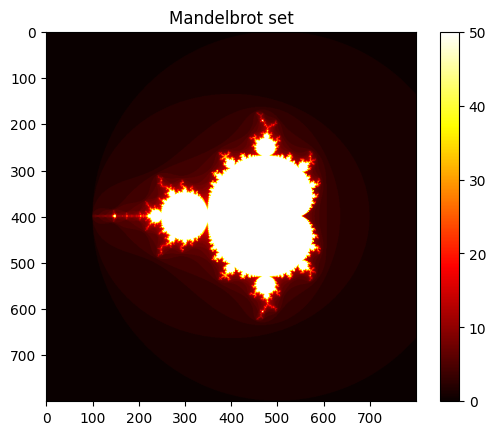

In [7]:
output = mandelbrot(mesh, num_iter=50)
kwargs = {'cmap': 'hot'}

plot_fractal(output, title='Mandelbrot set', **kwargs)

Some materials if you are stuck at this problem (or just want to learn more):

- Visualizing the relationship between the Julia and Mandelbrot sets in a **[web app](https://complex-analysis.com/content/julia_set.html)**.
- The shape you are [looking for](https://en.wikipedia.org/wiki/Mandelbrot_set#/media/File:Mandel_zoom_00_mandelbrot_set.jpg).
- [A course about Julia and Mandelbrot](https://e.math.cornell.edu/people/belk/dynamicalsystems/NotesJuliaMandelbrot.pdf).